In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])

## Read in the Universe

In [3]:
#Read all the trajectories
ku04amp02_folding= mda.Universe('ku04amp02_linear/sys_prod/prod_ku04amp02_linear.tpr', 'ku04amp02_linear/sys_prod/prod_ku04amp02_linear_compact_compact.xtc')


## RMSD Calculation

  0%|          | 0/5001 [00:00<?, ?it/s]

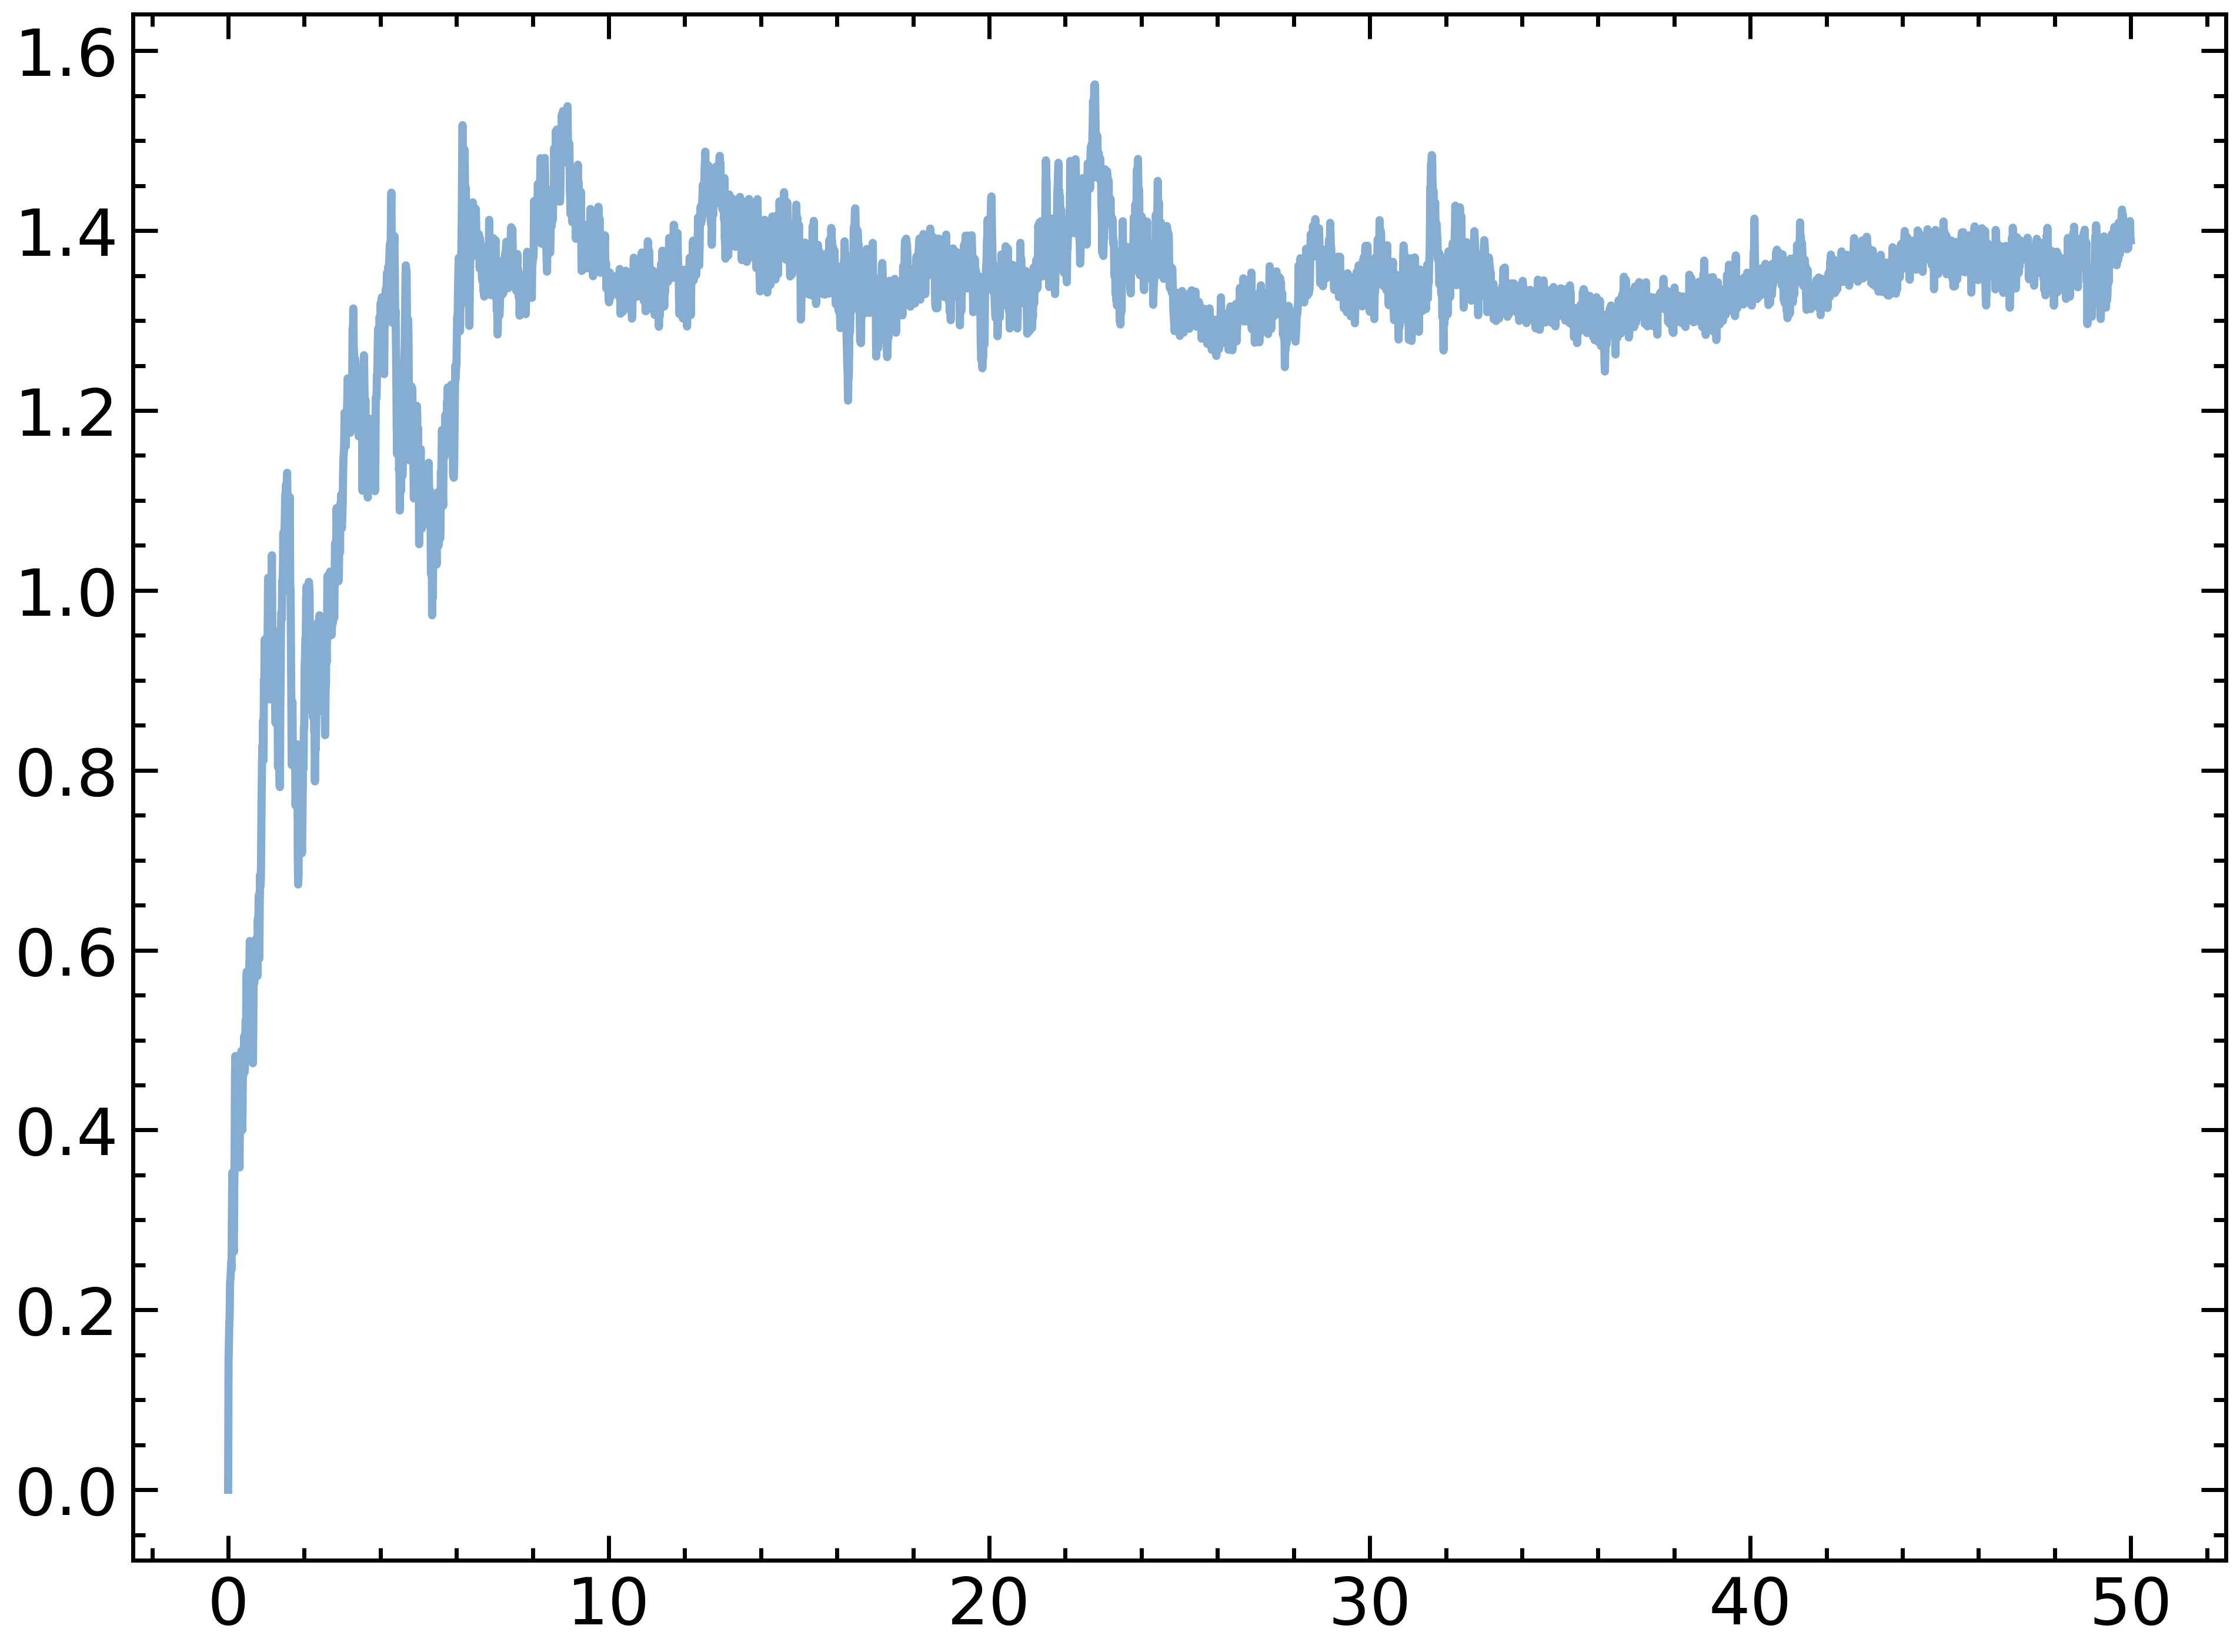

In [4]:
from MDAnalysis.analysis import rms

R = rms.RMSD(ku04amp02_folding,  # universe to align
    ku04amp02_folding,  # reference universe or atomgroup
    select='backbone',  # group to superimpose and calculate RMSD
    ref_frame=0)  # frame index of the reference

R.run(verbose=True)
times_c = R.results.rmsd[:,1]
rmsd_c = R.results.rmsd[:,2]
plt.plot(times_c/1000, rmsd_c/10, alpha=0.5)

## Radius of Gyration Calculation

  0%|          | 0/5001 [00:00<?, ?it/s]

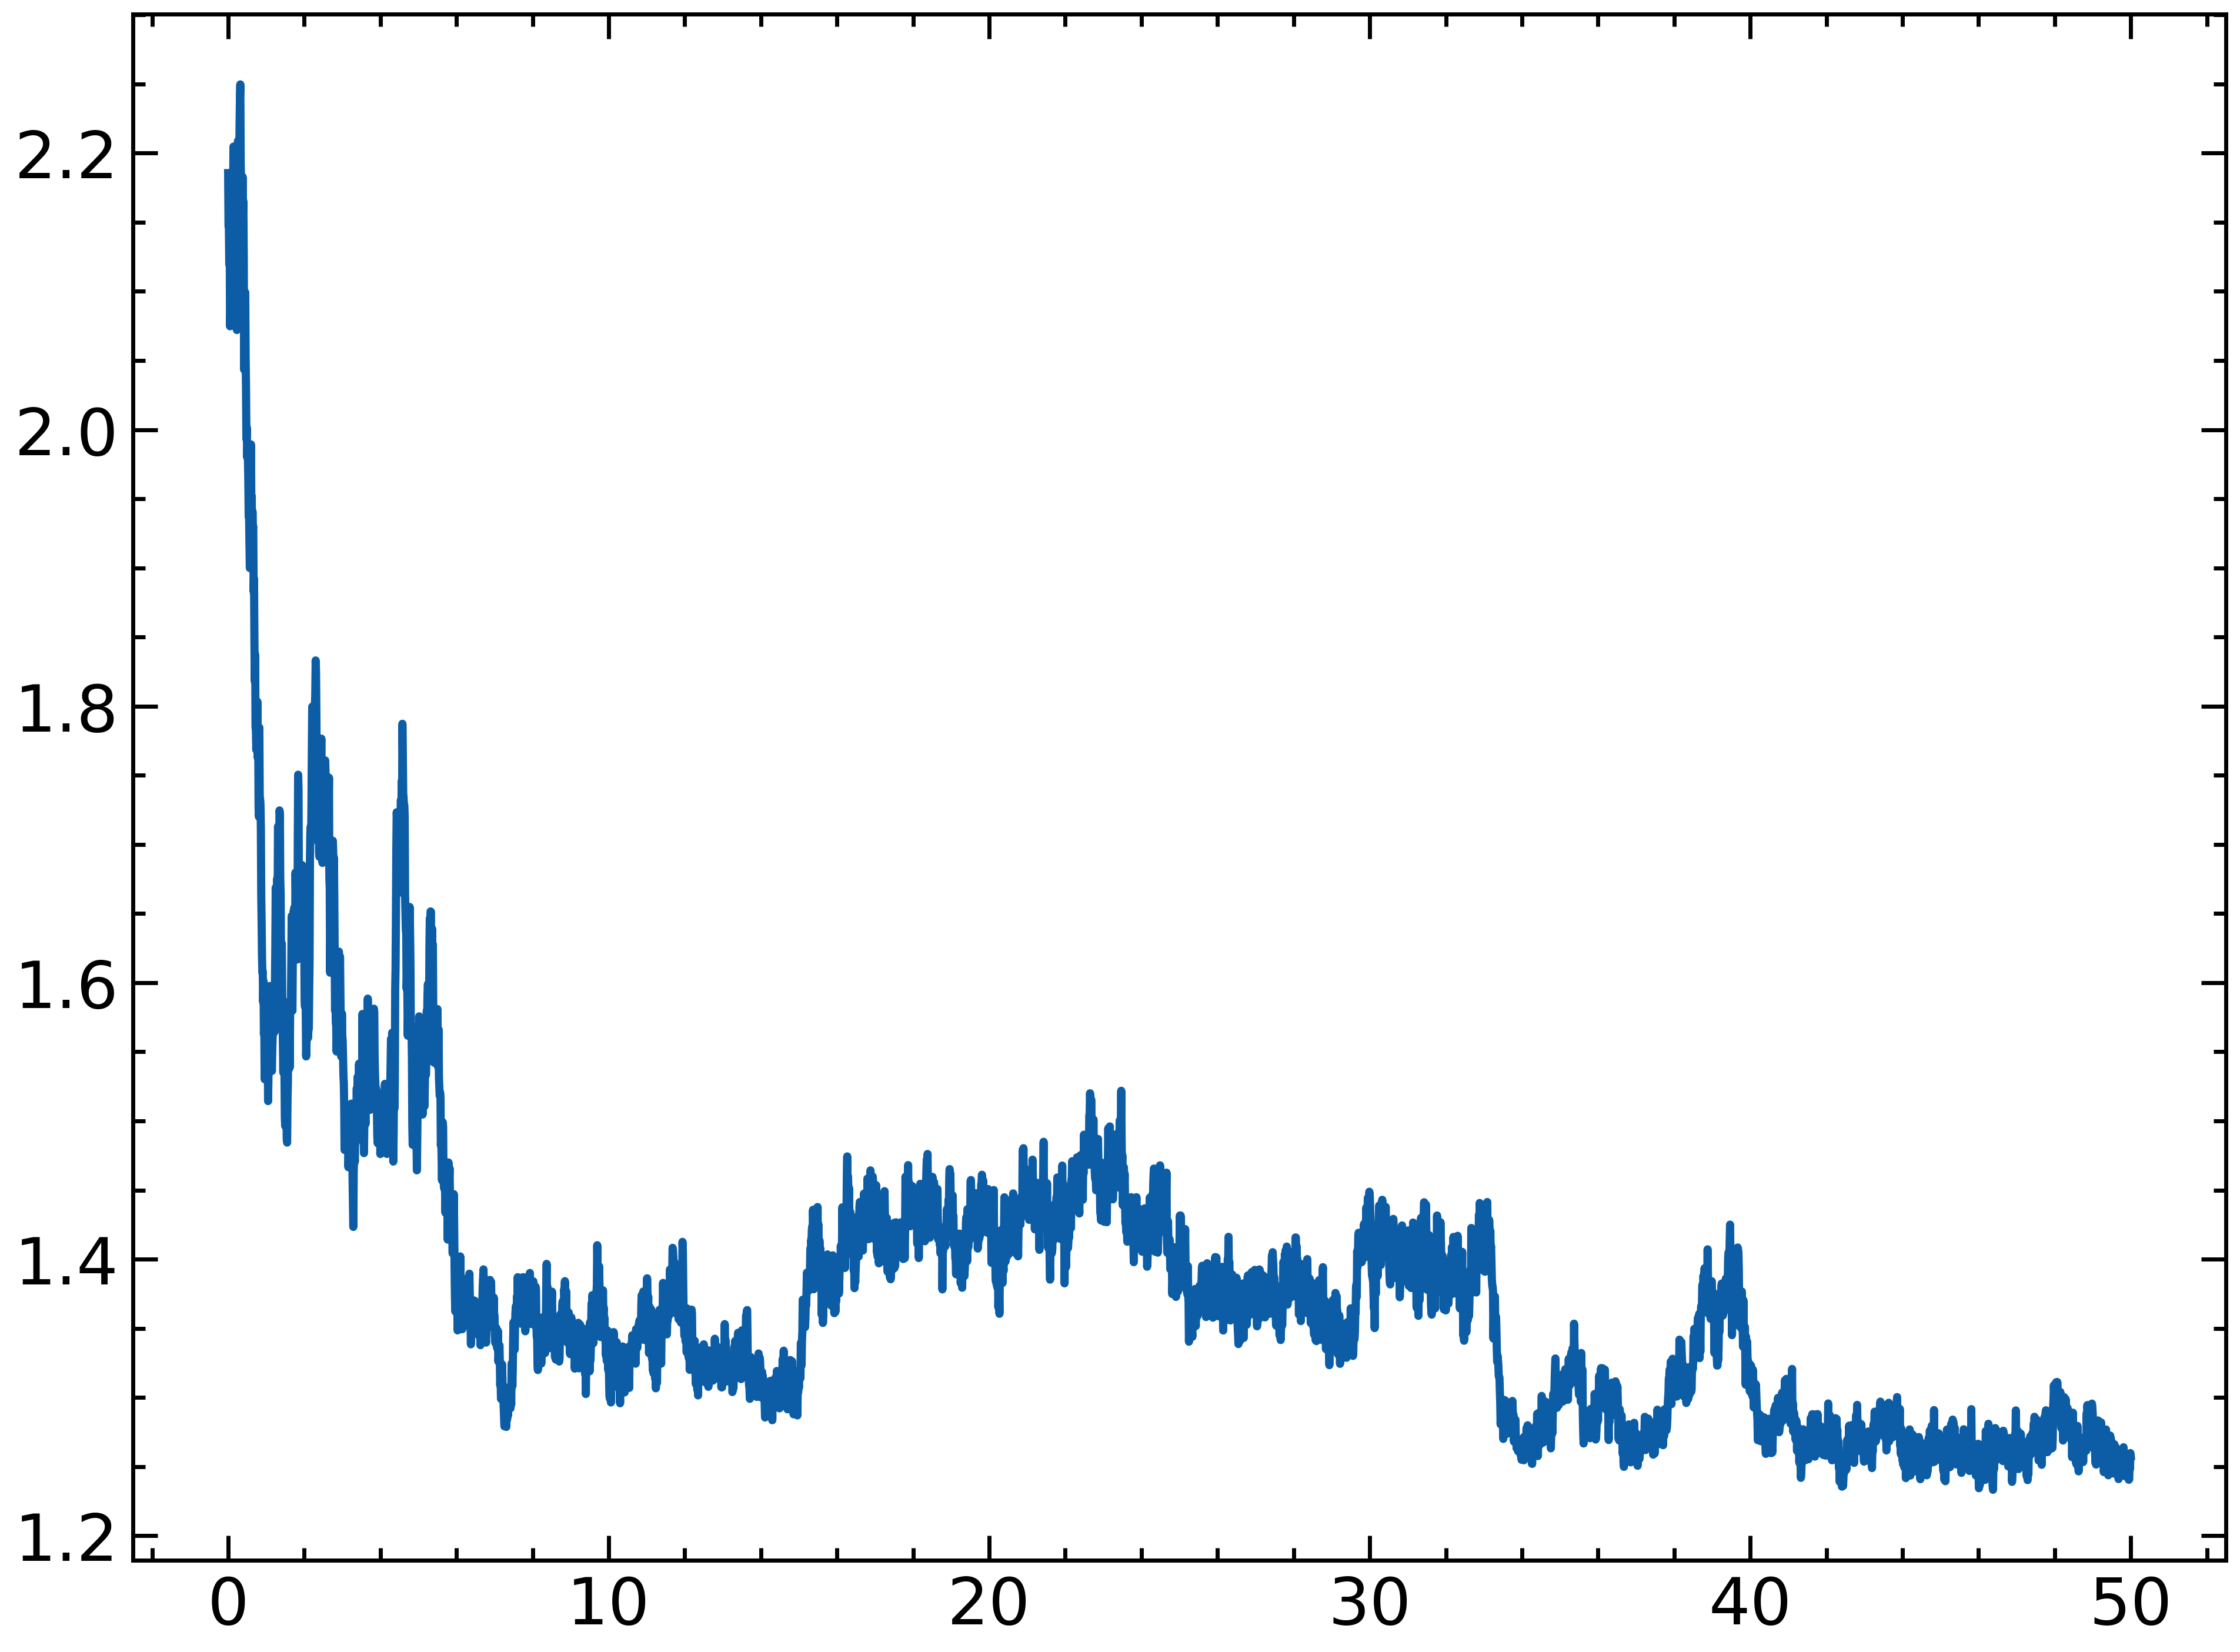

In [5]:
from tqdm.notebook import tqdm
group = ku04amp02_folding.select_atoms('protein')		# change the atom selection for your specific system

Frame = []
times = []
Rgyr = []
for ts in tqdm(ku04amp02_folding.trajectory):
	Frame.append(ts.frame)
	times.append(ku04amp02_folding.trajectory.time)
	Rgyr.append(group.radius_of_gyration())

Rgyrc_table = np.vstack((Frame, times, Rgyr)).T
plt.plot(Rgyrc_table[:,1]/1000, Rgyrc_table[:,2]/10)

## RMSF Calculation

Between protein backbone and Carbon alphas.

  0%|          | 0/5001 [00:00<?, ?it/s]

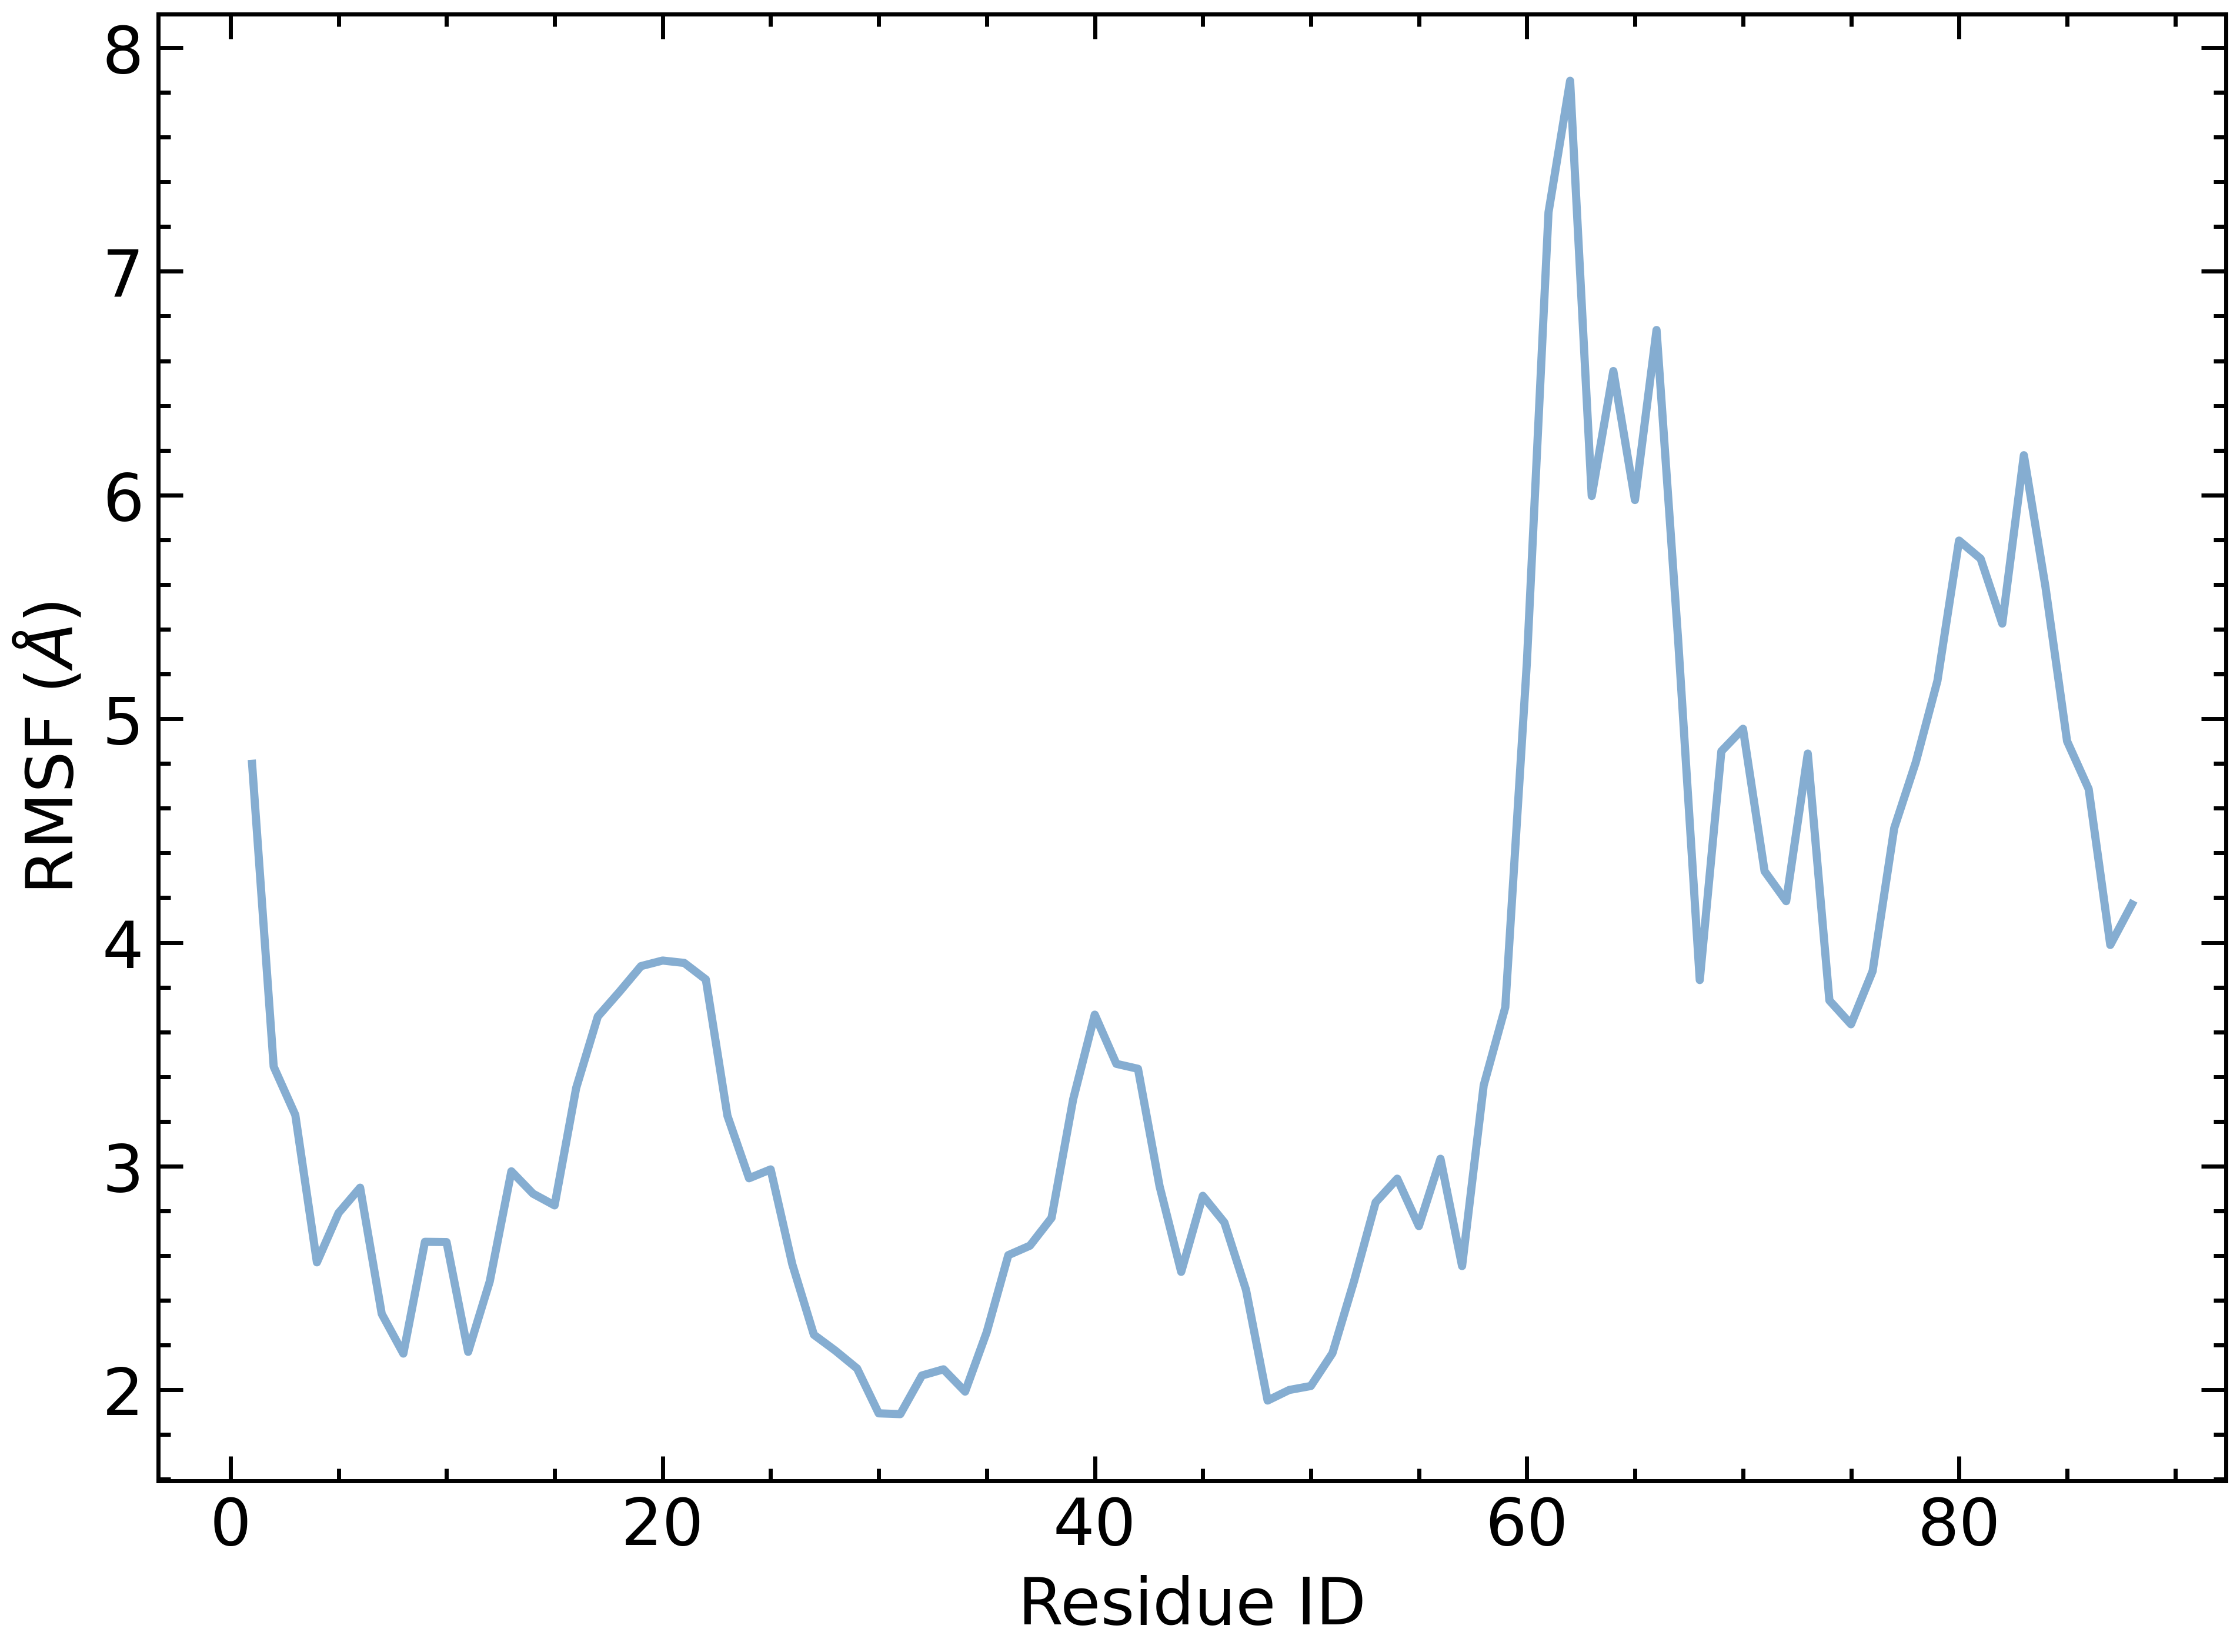

In [6]:
c_alphas_c = ku04amp02_folding.select_atoms('backbone and name CA')
R_c = rms.RMSF(c_alphas_c).run(verbose=True)
plt.xlabel('Residue ID')
plt.ylabel(r'RMSF $\left(\AA\right)$')
plt.plot(c_alphas_c.resids, R_c.results.rmsf, alpha=0.5)
plt.savefig('rmsf.png', dpi=600)

### Observations

Everything has stabilized after 30 ns. 

## Plots

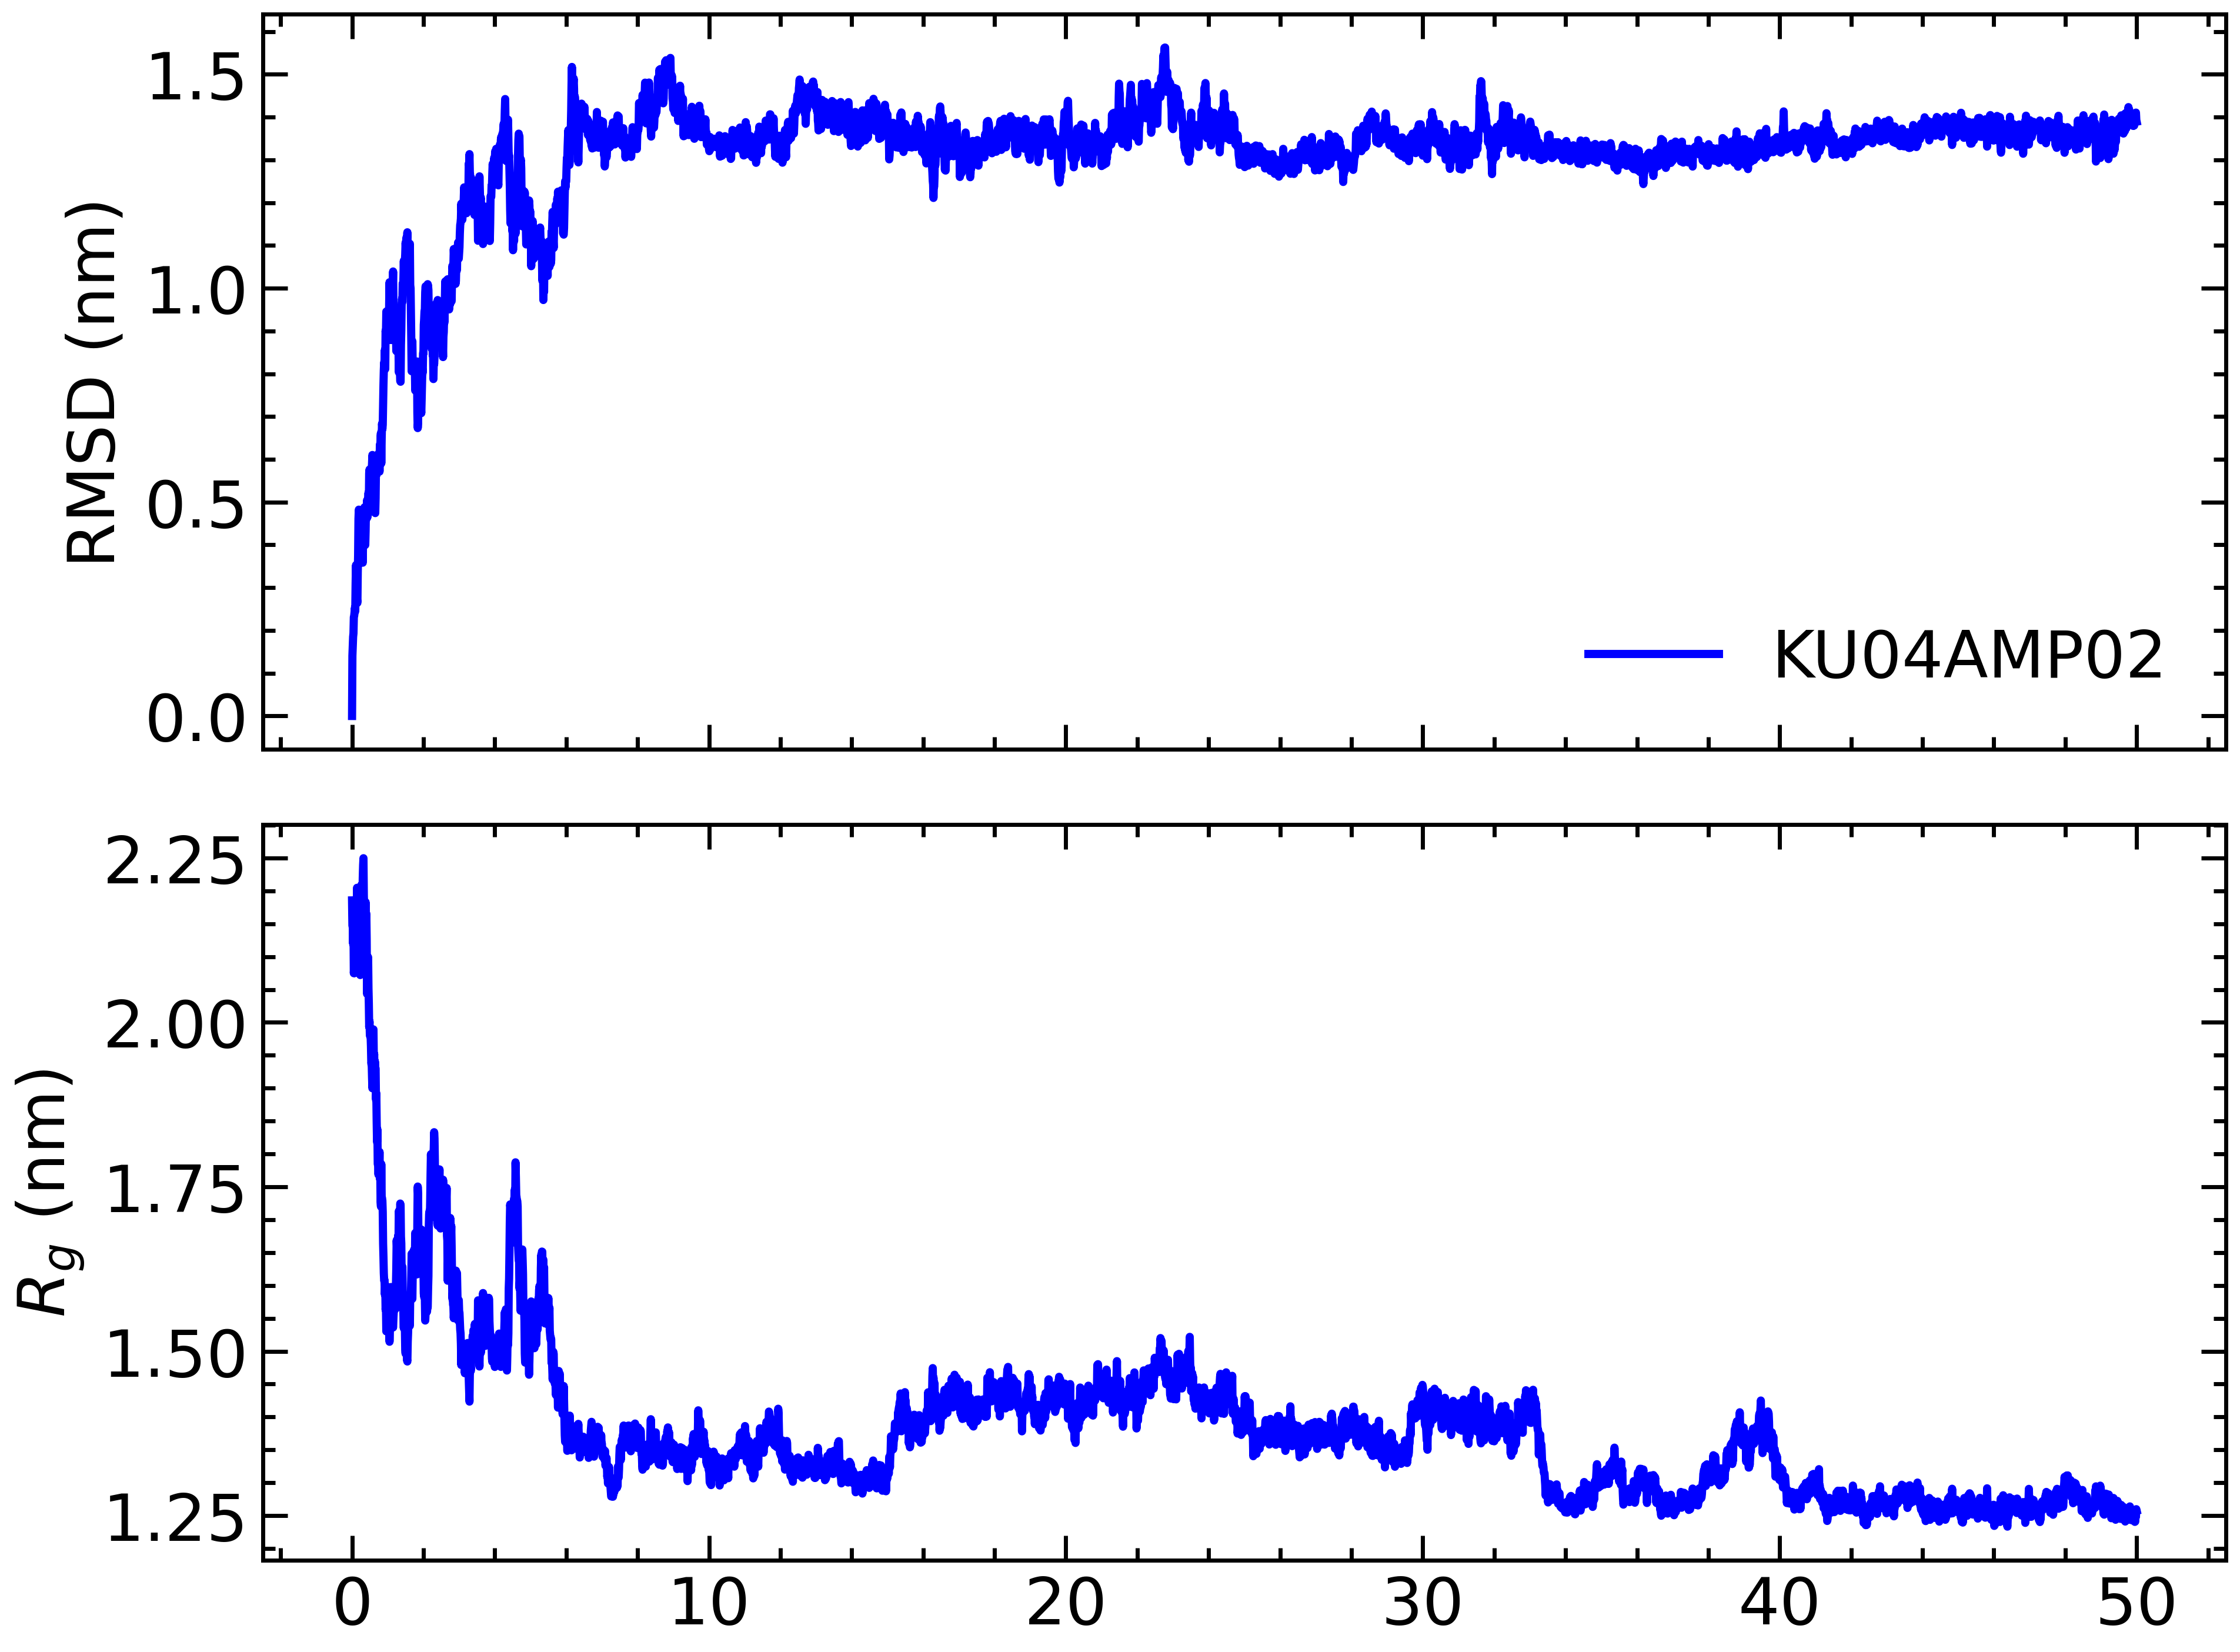

In [7]:
npanels = 2
fig, axs = plt.subplots(npanels,1, sharex=True, tight_layout=True)

ax_rmsd = axs[0]
ax_rmsd.set_ylabel(r'RMSD (nm)');


ax_rmsd.plot(times_c/1000, rmsd_c/10, label="KU04AMP02", 
        color='blue')

ax_rmsd.legend()

ax_rg = axs[1]

ax_rg.plot(Rgyrc_table[:,1]/1000, Rgyrc_table[:,2]/10, 
        label="Colpm-PEA", color='blue')
ax_rg.set_ylabel(r'$R_g$ (nm)');

plt.savefig("time-series-plots.png", dpi=600)
plt.show()

## Dihedral Angle Analysis

Ramchandran plots

In [8]:
from MDAnalysis.analysis.dihedrals import Ramachandran

residues = ku04amp02_folding.select_atoms('protein')

r = Ramachandran(residues).run()


/usr/local/miniforge3/envs/biobb_wf_protein-complex_md_setup/lib/python3.12/site-packages/MDAnalysis/analysis/dihedrals.py:444: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn(


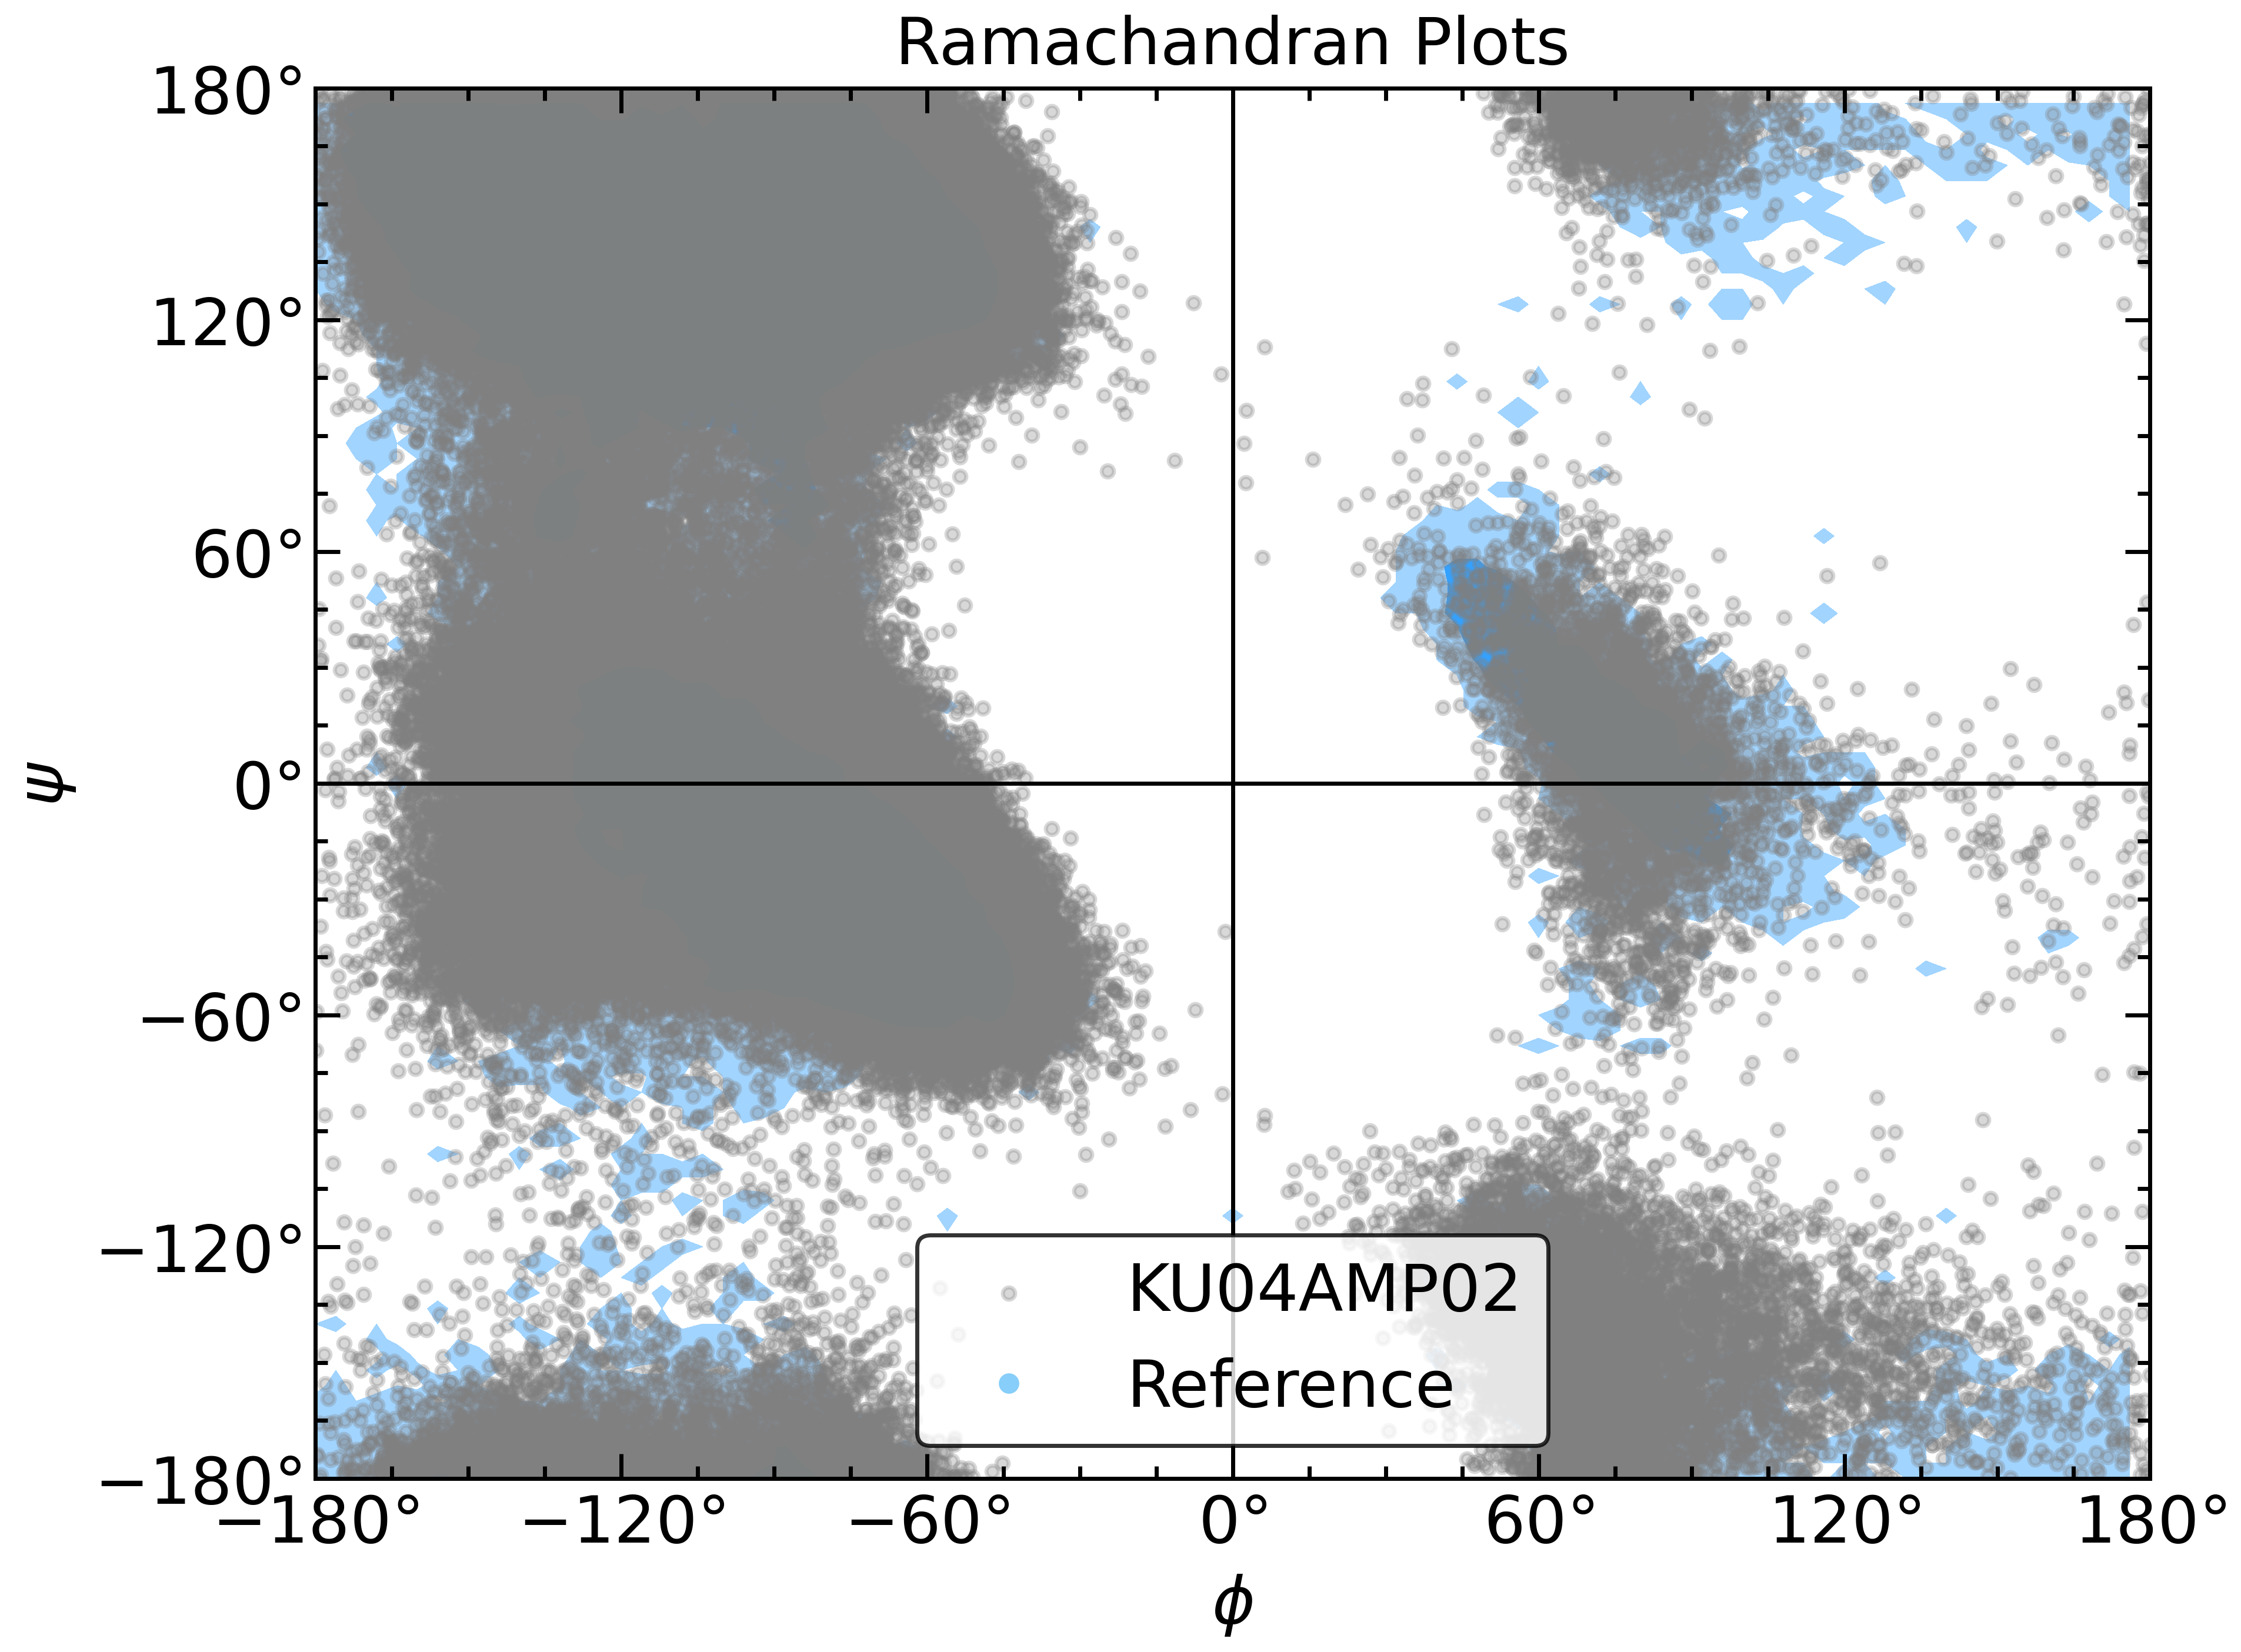

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Ramachandran Plots')
r.plot(ax=ax, ref=True, color='gray', marker='.', alpha=0.3, label='KU04AMP02')
ax.plot([], [], color='lightskyblue', marker='.', linestyle='None', markersize=8, label='Reference')
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.fancybox'] = True
ax.legend(loc="lower center")
plt.savefig('ramachandran.png', dpi=600)